## **1). BUSINESS UNDERSTANDING.**

My client is Leading retail store(supermarket) in the Kenya, They specialize in FMCG and electronics.The supermarket have provided me with the data to find the insight. 
My main objective is:
   

1.   Identify the best performing branch
2. Identify the performing Category.

2.   Most popular payment method
1.   The hour of the day with highest number of customers shopping
2.   Identify the preferred payment method by gender
1.   Have an overview of the customer type.Are loyal customers male or female?









# **2). DATA UNDERSTANDING.**

In [3]:
#####  IMPORTING THE LIBRARIES ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The data Is supermarket sales data, that was recorded in 3 branches in three months.It contain 12 columns and  sales recorded. The columns are as follows:

**Invoice id**: Computer generated sales slip invoice identification number

**Branch**: Branch of supercenter(3 branches are available identified by A, B and C)

**City**: Location of supercenters

**Customer type**: Type of customers, recorded by Members for customers using 
member card and Normal for without member card.

**Gender**: Gender type of customer

**Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price**: Price of each product in $

**Quantity**: Number of products purchased by customer

**Tax**: 5% tax fee for customer buying

**Total**: Total price including tax

**Date**: Date of purchase (Record available from January 2019 to March 2019)

**Time**: Purchase time (10am to 9pm)

**Payment**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS**: Cost of goods sold

**Gross margin percentage**: Gross margin percentage

**Gross income**: Gross income

**Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10

In [0]:
# loading our data
data=pd.read_csv('sales.csv')

In [5]:
# Previewing the data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#a description of our data
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
# data data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# **3.) DATA PREPARATION**



### *   Varidity





In [8]:
####  Dropping columns that are not needed in the analysis  #####

data=data.drop(['Invoice ID','Unit price','cogs','Tax 5%','gross margin percentage','gross income'],axis=1)
data.head(10)

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,7,627.6165,3/25/2019,18:30,Ewallet,4.1
6,A,Yangon,Member,Female,Electronic accessories,6,433.6920,2/25/2019,14:36,Ewallet,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,10,772.3800,2/24/2019,11:38,Ewallet,8.0
8,A,Yangon,Member,Female,Health and beauty,2,76.1460,1/10/2019,17:15,Credit card,7.2
9,B,Mandalay,Member,Female,Food and beverages,3,172.7460,2/20/2019,13:27,Credit card,5.9


In [9]:
### replacing the  branch name with the city name and  dropping the city column ##

data=data.replace(to_replace='A',value='Yangon')
data=data.replace(to_replace='B',value='Mandalay')
data=data.replace(to_replace='C',value='Naypyitaw')
# dropping city
data=data.drop(['City'],axis=1)
data.head()

,Branch,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,Rating
0,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6
2,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3




## *   Completeness



In [10]:
## looking  for null values
data.isnull().sum()
## our data has no null values

Branch           0
Customer type    0
Gender           0
Product line     0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64



## * Consitency



In [11]:
## looking for duplicates
data.duplicated()
# no duplicates in our data

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool



## * Uniformity



In [12]:
### Changing the column name
data.columns=['branch','customer type','gender','category','item.no','total','date','time','payment','rating']
data.head()

,branch,customer type,gender,category,item.no,total,date,time,payment,rating
0,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6
2,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3




## *  Data anormolies



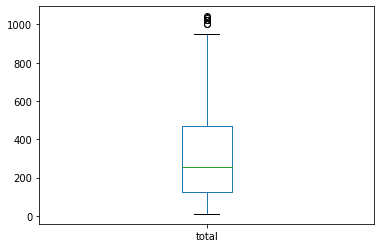

In [13]:
## looking for outliers in the total column in the data using boxplot
data.boxplot(column=['total'],grid=False)
##our data have outliers.

In [14]:
## Removing outliers based on the IQR range and stores the result in the data frame 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

#looking at the shape of our data
print(data.shape)


(991, 10)


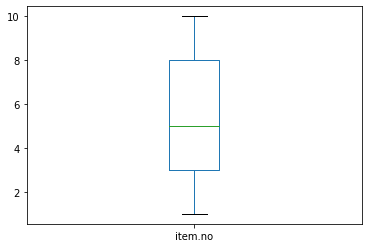

In [15]:
### looking for outliers in the item.no column in the data using boxplot
data.boxplot(column=['item.no'],grid=False)
#item.no have no outliers

In [16]:
# our data is ready for analysis
data.head(10)

,branch,customer type,gender,category,item.no,total,date,time,payment,rating
0,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,9.6
2,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,5.3
5,Naypyitaw,Normal,Male,Electronic accessories,7,627.6165,3/25/2019,18:30,Ewallet,4.1
6,Yangon,Member,Female,Electronic accessories,6,433.6920,2/25/2019,14:36,Ewallet,5.8
7,Naypyitaw,Normal,Female,Home and lifestyle,10,772.3800,2/24/2019,11:38,Ewallet,8.0
8,Yangon,Member,Female,Health and beauty,2,76.1460,1/10/2019,17:15,Credit card,7.2
9,Mandalay,Member,Female,Food and beverages,3,172.7460,2/20/2019,13:27,Credit card,5.9


## **4). DATA ANALYSIS**

## a.) Identify the best performing branch

                 total
branch                
Yangon     105161.0805
Naypyitaw  104441.4315
Mandalay   104152.7970


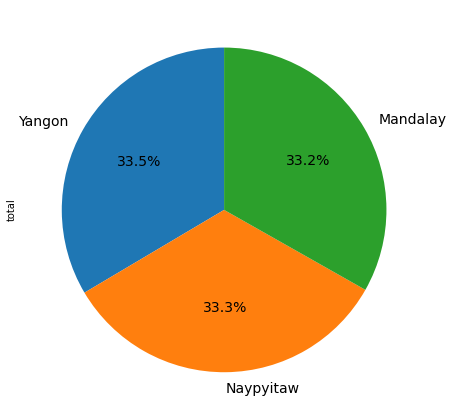

In [17]:
#SUBSETTING BRANCH TOTAL INCOME.
best=data[['branch','total']].pivot_table(values=['total'],index=['branch'],aggfunc=np.sum).sort_values(by='total',ascending=0)
print(best)
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
best.plot(kind='pie', y = 'total', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)



The branches have almost the same contribution to the company, but slightly Yangon supermarket contribute more than the rest.


## b). Identify the performing Category

                             total                category
category                                                  
Health and beauty       49193.7390       Health and beauty
Home and lifestyle      49789.6980      Home and lifestyle
Fashion accessories     51203.2500     Fashion accessories
Sports and travel       54120.7065       Sports and travel
Electronic accessories  54337.5315  Electronic accessories
Food and beverages      55110.3840      Food and beverages


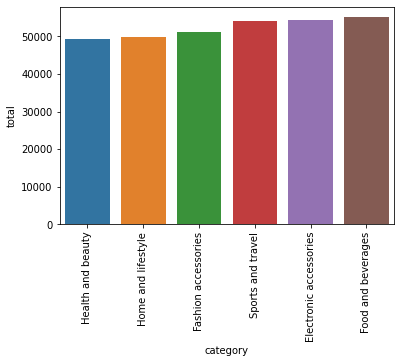

In [18]:
 category=data[['category','total']].pivot_table(values=['total'],index=['category'],aggfunc=np.sum).sort_values(by='total',ascending=1)
 category['category']=category.index
 print(category)
 chart=sns.barplot(x='category',y='total',data=category)
 for s in chart.get_xticklabels():
   s.set_rotation(90)


From the above  analysis we can see that Health and Beauty is the least performing category and food and beverages is  the best performing category.

## c). Most popular payment method.

                  total
payment                
Credit card   96642.042
Ewallet      106912.407
Cash         110200.860


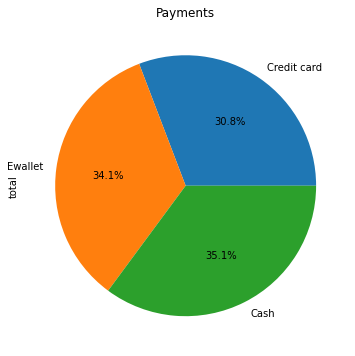

In [19]:
#### subsetting the payment methods by total
pay=data[['payment','total']].pivot_table(values=['total'],index=['payment'],aggfunc=np.sum).sort_values(by='total',ascending=1)
print(pay)
pay.plot.pie(y='total',title='Payments',autopct='%1.1f%%',figsize=(6,6),legend=False)

From the chart we can conclude that cash was the most popular mode of payment, and credit was least considered by most customers

## d). Identify the preferred payment method by gender

In [26]:
## SUBSETTING AND Ploting payment methods by gender
payments=data[['payment','gender','total']].groupby(['payment','gender']).count()
payments

total
payment     gender       
Cash        Female    177
            Male      165
Credit card Female    160
            Male      147
Ewallet     Female    158
            Male      184

most of the male preffered using Ewallet and females preffered using cash.

# e). an overview on customer rating
?

In [0]:
## creating a function that groups the rating
def group(rating):
  if (rating > 4.0) & (rating < 4.9):
    return 4
  if (rating > 5.0) & (rating < 5.9):
    return 5
  if (rating > 6.0) & (rating < 6.9):
    return 6
  if (rating > 7.0) & (rating < 7.9):
    return 7
  if (rating > 8.0) & (rating < 8.9):
    return 8
  if (rating > 9.0) & (rating < 9.9):
    return 9
  if rating < 4.0 :
    return 'less than 4'
data['group_rating']=data['rating'].apply(group)


In [53]:
#rating by branch
branch=data[['branch','group_rating','total']].groupby(['group_rating','branch']).count()
branch

total
group_rating branch          
4.0          Mandalay      45
             Naypyitaw     30
             Yangon        46
5.0          Mandalay      42
             Naypyitaw     41
             Yangon        40
6.0          Mandalay      56
             Naypyitaw     44
             Yangon        42
7.0          Mandalay      37
             Naypyitaw     41
             Yangon        56
8.0          Mandalay      35
             Naypyitaw     49
             Yangon        40
9.0          Mandalay      30
             Naypyitaw     50
             Yangon        50

## f). Customer analysis



                         total
customer type branch          
Member        Mandalay     165
              Naypyitaw    166
              Yangon       167
Normal        Mandalay     165
              Naypyitaw    156
              Yangon       172


Text(0.5, 1.0, 'Customer Type by Branch')

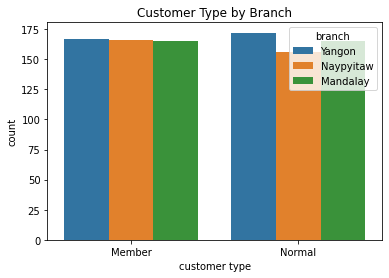

In [57]:
 #customer type per branch
 cust=data[['customer type','branch','total']].groupby(['customer type','branch']).count()
 print(cust)
 sns.countplot(x="customer type", hue = "branch", data =data).set_title("Customer Type by Branch")

                      total
customer type gender       
Member        Female    258
              Male      240
Normal        Female    237
              Male      256


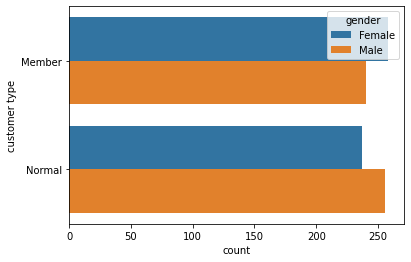

In [62]:
## customer type by gender
gen=data[['gender','total','customer type']].groupby(['customer type','gender']).count()
print(gen)
sns.countplot(y='customer type',hue='gender',data=data)